Classifying Whiskies

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
whisky = pd.read_csv("whiskies.txt")

In [10]:
whisky.head()

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude,Region
0,1,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,\tPH15 2EB,286580,749680,Highlands
1,2,Aberlour,3,3,1,0,0,4,3,2,2,3,3,2,\tAB38 9PJ,326340,842570,Speyside
2,3,AnCnoc,1,3,2,0,0,2,0,0,2,2,3,2,\tAB5 5LI,352960,839320,Highlands
3,4,Ardbeg,4,1,4,4,0,0,2,0,1,2,1,0,\tPA42 7EB,141560,646220,Islay
4,5,Ardmore,2,2,2,0,0,1,1,1,2,3,1,1,\tAB54 4NH,355350,829140,Highlands


In [11]:
whisky.head().T

,0,1,2,3,4
RowID,1,2,3,4,5
Distillery,Aberfeldy,Aberlour,AnCnoc,Ardbeg,Ardmore
Body,2,3,1,4,2
Sweetness,2,3,3,1,2
Smoky,2,1,2,4,2
Medicinal,0,0,0,4,0
Tobacco,0,0,0,0,0
Honey,2,4,2,0,1
Spicy,1,3,0,2,1
Winey,2,2,0,0,1


In [7]:
whisky["Region"] = pd.read_csv("regions.txt")

In [8]:
whisky.iloc[5:10, 0:5] # rows and columns

,RowID,Distillery,Body,Sweetness,Smoky
5,6,ArranIsleOf,2,3,1
6,7,Auchentoshan,0,2,0
7,8,Auchroisk,2,3,1
8,9,Aultmore,2,2,1
9,10,Balblair,2,3,2


In [13]:
flavors = whisky.iloc[:, 2:14]

## Exploring Correlations

In [14]:
corr_flavors = pd.DataFrame.corr(flavors)

In [15]:
corr_flavors

,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral
Body,1.000000,-0.136518,0.524032,0.354050,0.168718,0.082031,0.188500,0.408576,0.126323,-0.116859,-0.013205,-0.461203
Sweetness,-0.136518,1.000000,-0.405897,-0.392017,-0.147871,0.132558,-0.054200,0.115727,-0.032493,-0.001516,0.019820,0.144987
Smoky,0.524032,-0.405897,1.000000,0.686071,0.365501,-0.195318,0.231745,-0.028190,-0.023132,-0.192875,-0.312970,-0.431663
Medicinal,0.354050,-0.392017,0.686071,1.000000,0.425106,-0.396629,0.044903,-0.202651,-0.113671,-0.258959,-0.330975,-0.511323
Tobacco,0.168718,-0.147871,0.365501,0.425106,1.000000,-0.275490,0.054068,0.009097,-0.117717,-0.059347,-0.235145,-0.212375
Honey,0.082031,0.132558,-0.195318,-0.396629,-0.275490,1.000000,0.139563,0.362021,0.188492,0.310184,0.108822,0.183029
Spicy,0.188500,-0.054200,0.231745,0.044903,0.054068,0.139563,1.000000,0.092704,-0.042856,0.036303,0.144714,0.034663
Winey,0.408576,0.115727,-0.028190,-0.202651,0.009097,0.362021,0.092704,1.000000,0.198467,0.112368,0.090694,-0.126932
Nutty,0.126323,-0.032493,-0.023132,-0.113671,-0.117717,0.188492,-0.042856,0.198467,1.000000,0.066157,0.071765,0.018302
Malty,-0.116859,-0.001516,-0.192875,-0.258959,-0.059347,0.310184,0.036303,0.112368,0.066157,1.000000,0.207288,0.106309


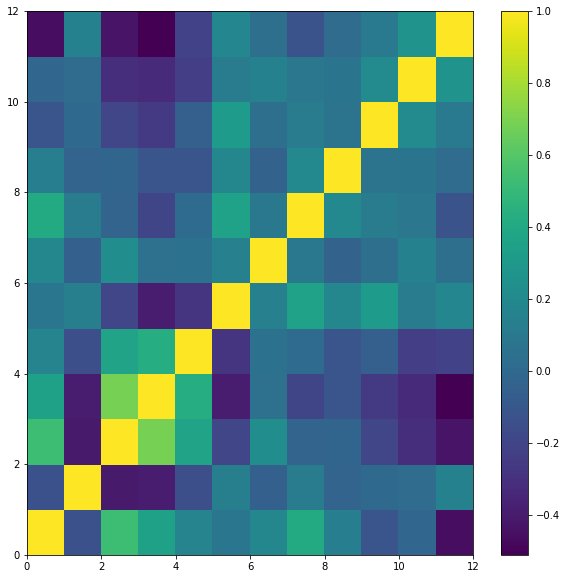

In [19]:
plt.figure(figsize = (10,10))
plt.pcolor(corr_flavors)
plt.colorbar()

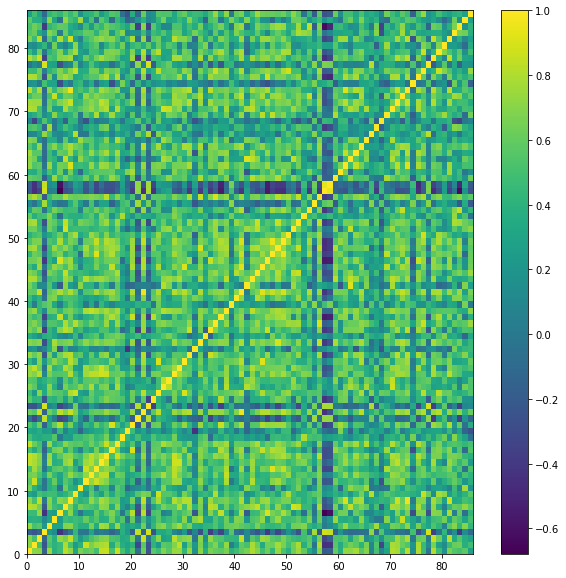

In [21]:
corr_whisky = pd.DataFrame.corr(flavors.transpose())
plt.figure(figsize = (10,10))
plt.pcolor(corr_whisky)
plt.axis()
plt.colorbar()

## Spectral co-clustering 

Spectral Co-Clustering algorithm (Dhillon, 2001).

Clusters rows and columns of an array X to solve the relaxed normalized cut of the bipartite graph created from X as follows: the edge between row vertex i and column vertex j has weight X[i, j].

The resulting bicluster structure is block-diagonal, since each row and each column belongs to exactly one bicluster.

Supports sparse matrices, as long as they are nonnegative.

The aim of co-clustering is to cluster the rows and columns of an input data matrix simultaneously. 

In [22]:
from sklearn.cluster._bicluster import SpectralCoclustering

In [23]:
model = SpectralCoclustering(n_clusters=6, random_state=0)

In [24]:
model.fit(corr_whisky)

SpectralCoclustering(n_clusters=6, random_state=0)

In [ ]:
model.rows_

Note: The output is an array with the following dimensions, number of row clusters times number of rows and the correlation matrix in the data.The entries of the array are either true or false. Each row in this array identifies a cluster, here ranging from 0 to 5, and each column identifies a row in the correlation matrix.
We can sum all of the columns of this output array by applying NumPy's "sum" method.


In [26]:
np.sum(model.rows_, axis= 1) # output shows how many clusters we have.

array([20,  5, 19, 17,  6, 19])

In [27]:
np.sum(model.rows_, axis= 0)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [28]:
model.row_labels_

array([5, 2, 3, 4, 5, 0, 3, 2, 5, 3, 2, 0, 5, 0, 5, 5, 0, 5, 0, 1, 3, 4,
       3, 4, 3, 3, 2, 2, 3, 2, 3, 5, 0, 0, 0, 5, 2, 3, 0, 1, 0, 3, 2, 2,
       2, 0, 5, 0, 0, 3, 3, 2, 2, 2, 0, 1, 5, 4, 4, 0, 3, 5, 2, 5, 5, 2,
       1, 5, 1, 0, 2, 5, 0, 5, 2, 5, 3, 4, 5, 3, 0, 3, 2, 0, 2, 0])

Note : İnterpretation of the output above; observation number 0 belongs to cluster number 5, observation number 1 belongs to cluster number 2, and so on.
All of the entries in the array have to be numbers between 0 and 5 because we specified 6 clusters.

## Comparing Correlation Matrices

In [31]:
whisky["Group"] = pd.Series(model.row_labels_, index= whisky.index) # extracting the group labels from the model append them to the whisky table.

whisky = whisky.iloc[np.argsort(model.row_labels_)]

whisky = whisky.reset_index(drop=True)

In [33]:
correlations = pd.DataFrame.corr(whisky.iloc[:, 2:14].transpose())

In [34]:
correlations = np.array(correlations)

(0.0, 86.0, 0.0, 86.0)

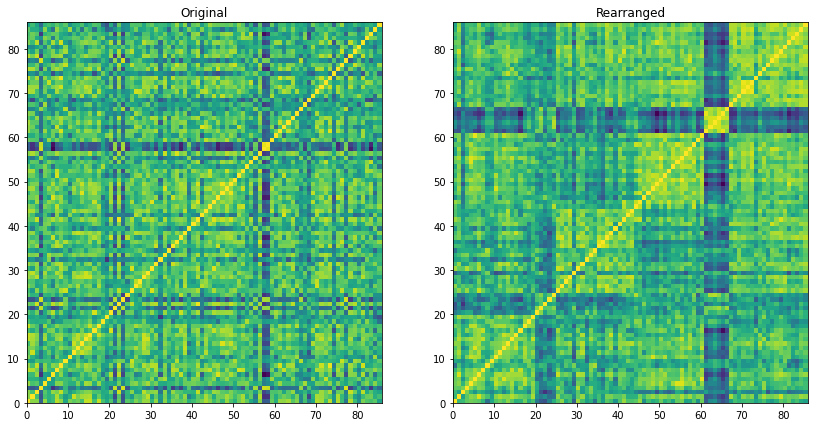

In [36]:
plt.figure(figsize = (14,7)) 
plt.subplot(121)
plt.pcolor(corr_whisky)
plt.title("Original")
plt.axis("tight")
plt.subplot(122)
plt.pcolor(correlations)
plt.title("Rearranged")
plt.axis("tight")

 You will be able to see visually those six blocks of whiskies. Based on this, we would expect whiskies that belong to the same block to be similar in their flavor.